In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
from nltk.sentiment import SentimentAnalyzer

C:\Users\jmvail\Anaconda3\envs\dsi\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
import pronouncing

In [3]:
import random

In [4]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jmvail\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jmvail\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\jmvail\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jmvail\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\jmvail\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [5]:
from nltk.corpus import treebank

In [6]:
train = pd.read_csv('./Data/train.csv')

In [7]:
y = pd.Series(train['author'])
y.value_counts()/len(y)

EAP    0.403494
MWS    0.308698
HPL    0.287808
Name: author, dtype: float64

In [24]:
y.value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

In [17]:
coun = y.value_counts()/len(y)

In [21]:
coun.values

array([0.40349354, 0.30869809, 0.28780837])

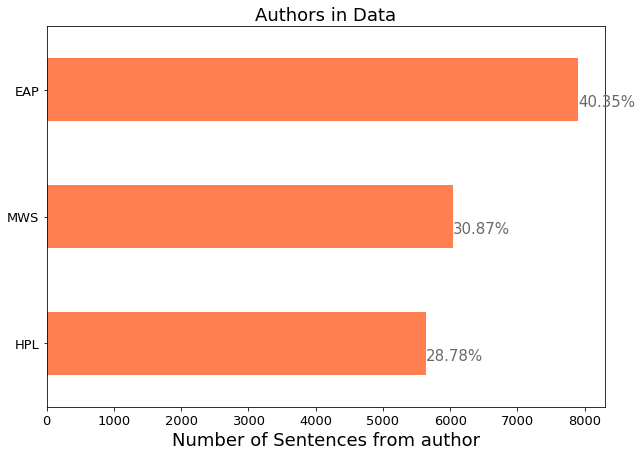

In [42]:
ax = y.value_counts().plot(kind='barh', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Authors in Data", fontsize=18)
ax.set_xlabel("Number of Sentences from author", fontsize=18);
#ax.set_xticks([0, .20, .40, .60])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer
nltk.download('vader_lexicon')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jmvail\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
def clean_ColText(data, col, stem=True):
    """Takes dataframe and column name and returns a dataframe with cleaned strings in the form of a list. Stemming is an option."""
    df = data.copy()
    table = str.maketrans('', '', string.punctuation)
    df[col] = df[col].map(lambda x: x.translate(table)) #remove punctuation
    df[col] = df[col].map(lambda x: x.lower()) #lowercase
    df[col] = df[col].apply(word_tokenize) #tokenize
    stop_words = set(stopwords.words('english'))
    df[col] = df[col].map(lambda x: [y for y in x if not y in stop_words]) #remove stop words
    df[col] = df[col].map(lambda x: [y for y in x if y not in ["’","’","”","“","‘","—"]]) #remove smart quotes and other non alphanums
    if stem:
        porter = PorterStemmer()
        df[col] = df[col].map(lambda x: [porter.stem(y) for y in x])
        return df
    return df

In [9]:
sid = SentimentIntensityAnalyzer()
df = pd.read_csv('./Data/train.csv')
df.id = df.id.map(lambda x: int(x.replace('id','')))
df['sent'] = df['text'].map(lambda x: sid.polarity_scores(x)['compound'])
df = clean_ColText(df, 'text', stem=True)
df = df.drop('id', axis=1)
df.head(10)

,text,author,sent
0,"[process, howev, afford, mean, ascertain, dime...",EAP,0.6329
1,"[never, occur, fumbl, might, mere, mistak]",HPL,-0.3400
2,"[left, hand, gold, snuff, box, caper, hill, cu...",EAP,0.9246
3,"[love, spring, look, windsor, terrac, sixteen,...",MWS,0.9460
4,"[find, noth, els, even, gold, superintend, aba...",HPL,-0.8385
5,"[youth, pass, solitud, best, year, spent, gent...",MWS,0.8714
6,"[astronom, perhap, point, took, refug, suggest...",EAP,0.0000
7,"[surcingl, hung, riband, bodi]",EAP,0.0000
8,"[knew, could, say, stereotomi, without, brough...",EAP,0.8821
9,"[confess, neither, structur, languag, code, go...",MWS,0.4215


In [10]:
train['text'][0]

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [11]:
sid.polarity_scores(train['text'][0])

{'neg': 0.049, 'neu': 0.83, 'pos': 0.12, 'compound': 0.6329}

# Metered 

In [12]:
train = pd.read_csv('./Data/train.csv')

In [13]:
train

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [14]:
test = pd.read_csv('./Data/test.csv')
test

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...
5,id27337,"""The thick and peculiar mist, or smoke, which ..."
6,id24265,"That which is not matter, is not at all unless..."
7,id25917,I sought for repose although I did not hope fo...
8,id04951,"Upon the fourth day of the assassination, a pa..."
9,id14549,"""The tone metaphysical is also a good one."


In [15]:
pronouncing.stresses_for_word(pronouncing.phones_for_word("sasdsy"))

TypeError: unhashable type: 'list'

In [17]:
text = "over many a quaint and curious volume of forgotten lore"
phones = [pronouncing.stresses_for_word(p)[0] for p in text.split()]
''.join(map(str, phones))

'10100101001010101'

In [38]:
phones

['HH ER1 M AH0 N',
 'IH1 Z',
 'DH AH0',
 'K R UW1 L AH0 S T',
 'M AH1 N TH',
 'B R IY1 D IH0 NG',
 'L AY1 L AE2 K S',
 'AW1 T',
 'AH1 V',
 'DH AH0',
 'D EH1 D']

In [70]:
text = "the astronomer perhaps at this point took refuge in the suggestion of non luminosity and here analogy was suddenly let fall"
phones = [pronouncing.stresses_for_word(p)[0] for p in text.split()]
''.join(map(str, phones))

IndexError: list index out of range

Need a "Try" and "Except" for this

In [71]:
phones

['HH ER1 M AH0 N',
 'IH1 Z',
 'DH AH0',
 'K R UW1 L AH0 S T',
 'M AH1 N TH',
 'B R IY1 D IH0 NG',
 'L AY1 L AE2 K S',
 'AW1 T',
 'AH1 V',
 'DH AH0',
 'D EH1 D']

In [45]:
pronouncing.stresses(s[0])

'10'

# Syllable_count

In [37]:
text = "herman is the cruelest month breeding lilacs out of the dead"
phones = [pronouncing.phones_for_word(p)[0] for p in text.split()]
max([pronouncing.syllable_count(p) for p in phones])

2

In [35]:
phones

['HH ER1 M AH0 N',
 'IH1 Z',
 'DH AH0',
 'K R UW1 L AH0 S T',
 'M AH1 N TH',
 'B R IY1 D IH0 NG',
 'L AY1 L AE2 K S',
 'AW1 T',
 'AH1 V',
 'DH AH0',
 'D EH1 D']

# break down scentence

In [7]:
train.text[0]

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [18]:
tokens = nltk.word_tokenize(train.text[0])
tokens

['This',
 'process',
 ',',
 'however',
 ',',
 'afforded',
 'me',
 'no',
 'means',
 'of',
 'ascertaining',
 'the',
 'dimensions',
 'of',
 'my',
 'dungeon',
 ';',
 'as',
 'I',
 'might',
 'make',
 'its',
 'circuit',
 ',',
 'and',
 'return',
 'to',
 'the',
 'point',
 'whence',
 'I',
 'set',
 'out',
 ',',
 'without',
 'being',
 'aware',
 'of',
 'the',
 'fact',
 ';',
 'so',
 'perfectly',
 'uniform',
 'seemed',
 'the',
 'wall',
 '.']

In [11]:
tagged = nltk.pos_tag(tokens)
tagged

[('A', 'DT'),
 ('youth', 'NN'),
 ('passed', 'VBN'),
 ('in', 'IN'),
 ('solitude', 'NN'),
 (',', ','),
 ('my', 'PRP$'),
 ('best', 'JJS'),
 ('years', 'NNS'),
 ('spent', 'VBD'),
 ('under', 'IN'),
 ('your', 'PRP$'),
 ('gentle', 'NN'),
 ('and', 'CC'),
 ('feminine', 'JJ'),
 ('fosterage', 'NN'),
 (',', ','),
 ('has', 'VBZ'),
 ('so', 'RB'),
 ('refined', 'VBN'),
 ('the', 'DT'),
 ('groundwork', 'NN'),
 ('of', 'IN'),
 ('my', 'PRP$'),
 ('character', 'NN'),
 ('that', 'IN'),
 ('I', 'PRP'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('overcome', 'VB'),
 ('an', 'DT'),
 ('intense', 'JJ'),
 ('distaste', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('usual', 'JJ'),
 ('brutality', 'NN'),
 ('exercised', 'VBN'),
 ('on', 'IN'),
 ('board', 'NN'),
 ('ship', 'NN'),
 (':', ':'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('never', 'RB'),
 ('believed', 'VBN'),
 ('it', 'PRP'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('necessary', 'JJ'),
 (',', ','),
 ('and', 'CC'),
 ('when', 'WRB'),
 ('I', 'PRP'),
 ('heard', 'VBD'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('

In [16]:
tagged[0][1]

'DT'

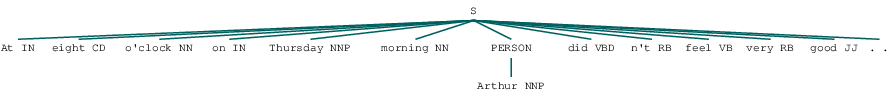

In [167]:
entities = nltk.chunk.ne_chunk(tagged)
entities

In [10]:
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

# Question

In [2]:
train = pd.read_csv('./Data/train.csv')

In [14]:
def find_question(q):
    if q[-1] == '?':
        return 1
    elif q[-1] == '"' and q[-2] == '?':
        return 1
    else:
        return 0

In [17]:
find_question(train['text'][6])

0

In [19]:
questions = []
for i in range(len(train['text'])):
    question = find_question(train['text'][i])
    questions.append(question)

In [21]:
sum(questions)

869

# Sylibals

In [11]:
import re

In [129]:
text = "april is the cruelest month breeding lilacs out of the dead"
[pronouncing.phones_for_word(p)[0] for p in text.split()]

['EY1 P R AH0 L',
 'IH1 Z',
 'DH AH0',
 'K R UW1 L AH0 S T',
 'M AH1 N TH',
 'B R IY1 D IH0 NG',
 'L AY1 L AE2 K S',
 'AW1 T',
 'AH1 V',
 'DH AH0',
 'D EH1 D']

In [12]:
def find_syllable(text):
    #remove punctuation and lowercase
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.split()
    phones = []
    for i in range(len(text)):
        #skips names and non-english words
        try:
            phone = pronouncing.phones_for_word(text[i])[0]
            phones.append(phone)
        except IndexError:
            pass
    try:
        d = max([pronouncing.syllable_count(p) for p in phones])
    except ValueError:
        d = 0
    return d

In [13]:
def word_count(text):
    #remove punctuation and lowercase
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.split() 
    return len(text)

In [14]:
len(word_count(train['text'][15]))

TypeError: object of type 'int' has no len()

In [158]:
find_syllable(train['text'][15])

4

In [159]:
syllables = []
for i in range(len(train['text'])):
    syllable = find_syllable(train['text'][i])
    syllables.append(syllable)

In [160]:
len(train['text'])

19579

In [168]:
syllables

[4,
 3,
 4,
 3,
 5,
 4,
 4,
 2,
 4,
 3,
 3,
 4,
 2,
 3,
 3,
 4,
 5,
 3,
 5,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 5,
 4,
 3,
 3,
 3,
 4,
 4,
 2,
 4,
 3,
 4,
 5,
 2,
 6,
 4,
 4,
 2,
 3,
 4,
 5,
 6,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 3,
 2,
 4,
 5,
 4,
 6,
 4,
 4,
 3,
 5,
 3,
 6,
 5,
 4,
 3,
 4,
 3,
 3,
 3,
 2,
 5,
 3,
 4,
 2,
 3,
 5,
 3,
 4,
 4,
 5,
 3,
 3,
 5,
 1,
 3,
 2,
 3,
 4,
 5,
 6,
 4,
 3,
 3,
 2,
 3,
 4,
 2,
 3,
 3,
 2,
 3,
 4,
 4,
 5,
 3,
 2,
 4,
 5,
 2,
 4,
 4,
 5,
 4,
 2,
 5,
 2,
 5,
 4,
 5,
 5,
 5,
 2,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 3,
 3,
 3,
 2,
 3,
 5,
 4,
 2,
 4,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 5,
 5,
 3,
 4,
 5,
 4,
 4,
 3,
 4,
 2,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 3,
 5,
 6,
 3,
 4,
 2,
 4,
 4,
 3,
 3,
 4,
 5,
 4,
 4,
 3,
 5,
 6,
 4,
 2,
 3,
 5,
 5,
 4,
 2,
 4,
 4,
 2,
 4,
 4,
 4,
 5,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 2,
 4,
 3,
 3,
 4,
 3,
 5,
 4,
 3,
 4,
 3,
 4,
 2,
 4,
 3,
 4,
 3,
 3,
 3,
 2,
 4,
 4,
 3,
 2,
 4,
 3,
 4,


In [151]:
train['text'][12868]

'Emicant Trabes quos docos vocant.'

# Past Tense

In [23]:
train.text[7]

'The surcingle hung in ribands from my body.'

In [24]:
tokens = nltk.word_tokenize(train.text[15])
tokens

['He',
 'had',
 'escaped',
 'me',
 ',',
 'and',
 'I',
 'must',
 'commence',
 'a',
 'destructive',
 'and',
 'almost',
 'endless',
 'journey',
 'across',
 'the',
 'mountainous',
 'ices',
 'of',
 'the',
 'ocean',
 ',',
 'amidst',
 'cold',
 'that',
 'few',
 'of',
 'the',
 'inhabitants',
 'could',
 'long',
 'endure',
 'and',
 'which',
 'I',
 ',',
 'the',
 'native',
 'of',
 'a',
 'genial',
 'and',
 'sunny',
 'climate',
 ',',
 'could',
 'not',
 'hope',
 'to',
 'survive',
 '.']

In [25]:
len(tokens)

52

In [47]:
#nltk.ConditionalFreqDist(train.text[5])

In [71]:
tagged = nltk.pos_tag(tokens)
tagged

[('He', 'PRP'),
 ('had', 'VBD'),
 ('escaped', 'VBN'),
 ('me', 'PRP'),
 (',', ','),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('must', 'MD'),
 ('commence', 'VB'),
 ('a', 'DT'),
 ('destructive', 'NN'),
 ('and', 'CC'),
 ('almost', 'RB'),
 ('endless', 'JJ'),
 ('journey', 'NN'),
 ('across', 'IN'),
 ('the', 'DT'),
 ('mountainous', 'JJ'),
 ('ices', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('ocean', 'NN'),
 (',', ','),
 ('amidst', 'NN'),
 ('cold', 'NN'),
 ('that', 'IN'),
 ('few', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('inhabitants', 'NNS'),
 ('could', 'MD'),
 ('long', 'VB'),
 ('endure', 'NN'),
 ('and', 'CC'),
 ('which', 'WDT'),
 ('I', 'PRP'),
 (',', ','),
 ('the', 'DT'),
 ('native', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('genial', 'JJ'),
 ('and', 'CC'),
 ('sunny', 'JJ'),
 ('climate', 'NN'),
 (',', ','),
 ('could', 'MD'),
 ('not', 'RB'),
 ('hope', 'VB'),
 ('to', 'TO'),
 ('survive', 'VB'),
 ('.', '.')]

In [ ]:
ConditionalFreqDist

In [19]:
len(tagged)

90

In [25]:
def past_tense(sentence):
    tokens = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokens)
    pasts = 0
    new_tagged = []
    while 
    for i in range(len(tagged)):
        if tagged[i][1] == 'VBD' or tagged[i][1]== 'VBN':
            pasts += 1
    return pasts

In [43]:
past_tense(train.text[9])

1

In [41]:
def present_tense(sentence):
    tokens = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokens)
    presents = 0
    for i in range(len(tagged)):
        if tagged[i][1] == 'VBP' or tagged[i][1]== 'VBG':
            presents += 1
    return presents

In [44]:
present_tense(train.text[9])

1

In [8]:
def determine_tense_input(sentance):
    text = nltk.word_tokenize(sentance)
    tagged = nltk.pos_tag(text)

    tense = {}
    tense["future"] = len([word for word in tagged if word[1] == "MD"])
    tense["present"] = len([word for word in tagged if word[1] in ["VBP", "VBZ","VBG"]])
    tense["past"] = len([word for word in tagged if word[1] in ["VBD", "VBN"]]) 
    return(tense)

In [9]:
train.author[180]

'HPL'

In [18]:
d = determine_tense_input(train.text[180])

In [22]:
d['future']

0

In [68]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

In [72]:
cp = nltk.RegexpParser(grammar)
result = cp.parse(tagged)
print(result)

(S
  He/PRP
  had/VBD
  escaped/VBN
  me/PRP
  ,/,
  and/CC
  I/PRP
  must/MD
  commence/VB
  (NP a/DT destructive/NN)
  and/CC
  almost/RB
  (NP endless/JJ journey/NN)
  across/IN
  the/DT
  mountainous/JJ
  ices/NNS
  of/IN
  (NP the/DT ocean/NN)
  ,/,
  (NP amidst/NN)
  (NP cold/NN)
  that/IN
  few/JJ
  of/IN
  the/DT
  inhabitants/NNS
  could/MD
  long/VB
  (NP endure/NN)
  and/CC
  which/WDT
  I/PRP
  ,/,
  (NP the/DT native/NN)
  of/IN
  a/DT
  genial/JJ
  and/CC
  (NP sunny/JJ climate/NN)
  ,/,
  could/MD
  not/RB
  hope/VB
  to/TO
  survive/VB
  ./.)


In [80]:
result.draw()

In [26]:
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]

In [27]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

In [28]:
cp = nltk.RegexpParser(grammar)

In [29]:
result = cp.parse(sentence)

In [30]:
print(result)

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


In [32]:
grammar = r"""
  NP:
    {<.*>+}          # Chunk everything
    }<VBD|IN>+{      # Chink sequences of VBD and IN
  """

In [48]:
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),
       ("dog", "NN"), ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")]

In [49]:
cp = nltk.RegexpParser(grammar)

In [50]:
iob_tags = tree2conlltags(cp.parse(sentence))
print(iob_tags)

[('the', 'DT', 'B-NP'), ('little', 'JJ', 'I-NP'), ('yellow', 'JJ', 'I-NP'), ('dog', 'NN', 'I-NP'), ('barked', 'VBD', 'O'), ('at', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('cat', 'NN', 'I-NP')]


# Breaking down scentence

In [59]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk import conlltags2tree, tree2conlltags

In [129]:
tokens = nltk.word_tokenize(train.text[2])
tokens

['In',
 'his',
 'left',
 'hand',
 'was',
 'a',
 'gold',
 'snuff',
 'box',
 ',',
 'from',
 'which',
 ',',
 'as',
 'he',
 'capered',
 'down',
 'the',
 'hill',
 ',',
 'cutting',
 'all',
 'manner',
 'of',
 'fantastic',
 'steps',
 ',',
 'he',
 'took',
 'snuff',
 'incessantly',
 'with',
 'an',
 'air',
 'of',
 'the',
 'greatest',
 'possible',
 'self',
 'satisfaction',
 '.']

In [130]:
tagged = nltk.pos_tag(tokens)
tagged

[('In', 'IN'),
 ('his', 'PRP$'),
 ('left', 'JJ'),
 ('hand', 'NN'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('gold', 'JJ'),
 ('snuff', 'NN'),
 ('box', 'NN'),
 (',', ','),
 ('from', 'IN'),
 ('which', 'WDT'),
 (',', ','),
 ('as', 'IN'),
 ('he', 'PRP'),
 ('capered', 'VBD'),
 ('down', 'RP'),
 ('the', 'DT'),
 ('hill', 'NN'),
 (',', ','),
 ('cutting', 'VBG'),
 ('all', 'DT'),
 ('manner', 'NN'),
 ('of', 'IN'),
 ('fantastic', 'JJ'),
 ('steps', 'NNS'),
 (',', ','),
 ('he', 'PRP'),
 ('took', 'VBD'),
 ('snuff', 'NN'),
 ('incessantly', 'RB'),
 ('with', 'IN'),
 ('an', 'DT'),
 ('air', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('greatest', 'JJS'),
 ('possible', 'JJ'),
 ('self', 'NN'),
 ('satisfaction', 'NN'),
 ('.', '.')]

In [131]:
grammar = r"""
  NP:
    {<.*>+}          # Chunk everything
    }<VBD|IN>+{      # Chink sequences of VBD and IN
  """

In [132]:
cp = nltk.RegexpParser(grammar)

In [133]:
iob_tags = tree2conlltags(cp.parse(tagged))
print(iob_tags)

[('In', 'IN', 'O'), ('his', 'PRP$', 'B-NP'), ('left', 'JJ', 'I-NP'), ('hand', 'NN', 'I-NP'), ('was', 'VBD', 'O'), ('a', 'DT', 'B-NP'), ('gold', 'JJ', 'I-NP'), ('snuff', 'NN', 'I-NP'), ('box', 'NN', 'I-NP'), (',', ',', 'I-NP'), ('from', 'IN', 'O'), ('which', 'WDT', 'B-NP'), (',', ',', 'I-NP'), ('as', 'IN', 'O'), ('he', 'PRP', 'B-NP'), ('capered', 'VBD', 'O'), ('down', 'RP', 'B-NP'), ('the', 'DT', 'I-NP'), ('hill', 'NN', 'I-NP'), (',', ',', 'I-NP'), ('cutting', 'VBG', 'I-NP'), ('all', 'DT', 'I-NP'), ('manner', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('fantastic', 'JJ', 'B-NP'), ('steps', 'NNS', 'I-NP'), (',', ',', 'I-NP'), ('he', 'PRP', 'I-NP'), ('took', 'VBD', 'O'), ('snuff', 'NN', 'B-NP'), ('incessantly', 'RB', 'I-NP'), ('with', 'IN', 'O'), ('an', 'DT', 'B-NP'), ('air', 'NN', 'I-NP'), ('of', 'IN', 'O'), ('the', 'DT', 'B-NP'), ('greatest', 'JJS', 'I-NP'), ('possible', 'JJ', 'I-NP'), ('self', 'NN', 'I-NP'), ('satisfaction', 'NN', 'I-NP'), ('.', '.', 'I-NP')]


In [75]:
tree = conlltags2tree(iob_tags)
print(tree)

(S
  (NP He/PRP)
  had/VBD
  (NP
    escaped/VBN
    me/PRP
    ,/,
    and/CC
    I/PRP
    must/MD
    commence/VB
    a/DT
    destructive/NN
    and/CC
    almost/RB
    endless/JJ
    journey/NN)
  across/IN
  (NP the/DT mountainous/JJ ices/NNS)
  of/IN
  (NP the/DT ocean/NN ,/, amidst/NN cold/NN)
  that/IN
  (NP few/JJ)
  of/IN
  (NP
    the/DT
    inhabitants/NNS
    could/MD
    long/VB
    endure/NN
    and/CC
    which/WDT
    I/PRP
    ,/,
    the/DT
    native/NN)
  of/IN
  (NP
    a/DT
    genial/JJ
    and/CC
    sunny/JJ
    climate/NN
    ,/,
    could/MD
    not/RB
    hope/VB
    to/TO
    survive/VB
    ./.))


In [68]:
tree.draw()

In [92]:
iob_tags[0][2]

'B-NP'

In [ ]:
grammar = r"""
  NP:
    {<.*>+}          # Chunk everything
    }<VBD|IN>+{      # Chink sequences of VBD and IN
  """

In [ ]:
cp = nltk.RegexpParser(grammar)

In [87]:
def determine_tense(sentance):
    text = nltk.word_tokenize(sentance)
    tagged = nltk.pos_tag(text)
    iob_tags = tree2conlltags(cp.parse(tagged))

    tense = {}
    tense["future"] = len([word for word in iob_tags if word[1] == "MD"] and word[2] == 'O')
    tense["present"] = len([word for word in iob_tags if word[1] in ["VBP", "VBZ","VBG"]] and word[2] == 'O')
    tense["past"] = len([word for word in iob_tags if word[1] in ["VBD", "VBN"]] and word[2] == 'O') 
    return(tense)

In [88]:
determine_tense(train.text[15])

NameError: name 'word' is not defined

In [123]:
def determine_tense_input(sentance):
    text = nltk.word_tokenize(sentance)
    tagged = nltk.pos_tag(text)

    tense = {}
    tense["future"] = len([word for word in tagged if word[1] == "MD"])
    tense["present"] = len([word for word in tagged if word[1] in ["VBP", "VBZ","VBG"]])
    tense["past"] = len([word for word in tagged if word[1] in ["VBD", "VBN"]]) 
    return(tense)

In [100]:
def past_tense(sentence):
    tokens = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokens)
    iob_tags = tree2conlltags(cp.parse(tagged))
    pasts = 0
    new_tagged = []
    for i in range(len(iob_tags)):
        if iob_tags[i][1] in ["VBD", "VBN"] and iob_tags[i][2] == 'O':
            pasts += 1
    return pasts

In [128]:
past_tense(train.text[2])

3

In [110]:
def present_tense(sentence):
    tokens = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokens)
    iob_tags = tree2conlltags(cp.parse(tagged))
    presents = 0
    for i in range(len(tagged)):
        if iob_tags[i][1] in ["VBP", "VBZ","VBG"] and iob_tags[i][2] == 'O':
            presents += 1
    return presents

In [127]:
present_tense(train.text[2])

0

In [126]:
determine_tense_input(train.text[2])

{'future': 0, 'present': 1, 'past': 3}

In [ ]:
#Textblob